Required Module

In [15]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

Load and Preprocess Data

In [16]:
data = pd.read_csv("breast_cancer_data.csv")

data['diagnosis'] = LabelEncoder().fit_transform(data['diagnosis'])  # M=1, B=0

X = data.drop(['id', 'diagnosis', 'Unnamed: 32'], axis=1)
y = data['diagnosis']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Train-Test Split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

Model Training

In [18]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        72
           1       1.00      0.93      0.96        42

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114



Model Evaluation

In [19]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]))

Accuracy: 0.9736842105263158
ROC-AUC: 0.9928902116402116


🎯 Feature Importance


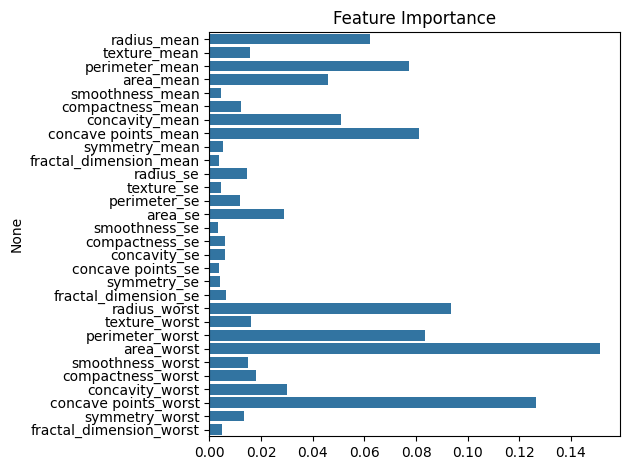

In [20]:
feat_importance = model.feature_importances_
feat_names = X.columns

sns.barplot(x=feat_importance, y=feat_names)
plt.title("Feature Importance")
plt.tight_layout()
plt.show()